<a href="https://colab.research.google.com/github/chiquitoyano/Juciba/blob/master/Planilla_Estudio_Covid_Big_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analisis de Casos Covid_Big_Data

Carga de datos

In [1]:
from google.colab import files
uploaded_file = files.upload()

Saving owid-covid-dataC.csv to owid-covid-dataC.csv


Importando las Librerias

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import statsmodels.api as sm

In [ ]:
import plotly.express as px

In [ ]:
data = pd.read_csv("covidBigDta.csv")

Muestra los primeros registros  

In [ ]:
data = pd.read_csv("covidBigDta.csv", sep=";")

<ipython-input-9-f8051516125d>:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("covidBigDta.csv", sep=";")


In [ ]:
data.head()

,iso_code,continente,pais,fecha,total_casos,nuevos_casos,total_muertes,nuevas_muertes,pacientes_uci,pacientes_hosp,...,poblacion_densidad,media_edad,edad_65_mayor,edad_70_mayor,pib_per_capita,diabetes_prevalencia,mujer_fuma,hombre_fuma,hospital_beds_per_thousand,population
0,AFG,Asia,Afghanistan,03-01-2020,NaN,0.0,NaN,0.0,NaN,NaN,...,54.422,18.6,2.581,1.337,1.803.987,9.59,NaN,NaN,0.5,41128772.0
1,AFG,Asia,Afghanistan,04-01-2020,NaN,0.0,NaN,0.0,NaN,NaN,...,54.422,18.6,2.581,1.337,1.803.987,9.59,NaN,NaN,0.5,41128772.0
2,AFG,Asia,Afghanistan,05-01-2020,NaN,0.0,NaN,0.0,NaN,NaN,...,54.422,18.6,2.581,1.337,1.803.987,9.59,NaN,NaN,0.5,41128772.0
3,AFG,Asia,Afghanistan,06-01-2020,NaN,0.0,NaN,0.0,NaN,NaN,...,54.422,18.6,2.581,1.337,1.803.987,9.59,NaN,NaN,0.5,41128772.0
4,AFG,Asia,Afghanistan,07-01-2020,NaN,0.0,NaN,0.0,NaN,NaN,...,54.422,18.6,2.581,1.337,1.803.987,9.59,NaN,NaN,0.5,41128772.0


Mostrar los tipos de datos

In [ ]:
tipos_de_datos = data.dtypes
print(tipos_de_datos)

iso_code                       object
continente                     object
pais                           object
fecha                          object
total_casos                   float64
nuevos_casos                  float64
total_muertes                 float64
nuevas_muertes                float64
pacientes_uci                 float64
pacientes_hosp                float64
semana_uci_admision           float64
semana_hosp_admision          float64
total_tests                   float64
new_tests                     float64
positivo_tasa                 float64
total_vacunacion              float64
personas_vacunadas            float64
personas_full_vacunadas       float64
poblacion_densidad             object
media_edad                    float64
edad_65_mayor                 float64
edad_70_mayor                 float64
pib_per_capita                 object
diabetes_prevalencia          float64
mujer_fuma                    float64
hombre_fuma                   float64
hospital_bed

Eliminar columnas Irrelevantes

In [ ]:
columnas_irrelevantes = ["semana_uci_admision", "positivo_tasa","semana_hosp_admision","pib_per_capita","hospital_beds_per_thousand"]

In [ ]:
Data_1 = data.drop(columns=columnas_irrelevantes)

In [ ]:
Data_1.head()

,iso_code,continente,pais,fecha,total_casos,nuevos_casos,total_muertes,nuevas_muertes,pacientes_uci,pacientes_hosp,...,personas_vacunadas,personas_full_vacunadas,poblacion_densidad,media_edad,edad_65_mayor,edad_70_mayor,diabetes_prevalencia,mujer_fuma,hombre_fuma,population
0,AFG,Asia,Afghanistan,03-01-2020,NaN,0.0,NaN,0.0,NaN,NaN,...,NaN,NaN,54.422,18.6,2.581,1.337,9.59,NaN,NaN,41128772.0
1,AFG,Asia,Afghanistan,04-01-2020,NaN,0.0,NaN,0.0,NaN,NaN,...,NaN,NaN,54.422,18.6,2.581,1.337,9.59,NaN,NaN,41128772.0
2,AFG,Asia,Afghanistan,05-01-2020,NaN,0.0,NaN,0.0,NaN,NaN,...,NaN,NaN,54.422,18.6,2.581,1.337,9.59,NaN,NaN,41128772.0
3,AFG,Asia,Afghanistan,06-01-2020,NaN,0.0,NaN,0.0,NaN,NaN,...,NaN,NaN,54.422,18.6,2.581,1.337,9.59,NaN,NaN,41128772.0
4,AFG,Asia,Afghanistan,07-01-2020,NaN,0.0,NaN,0.0,NaN,NaN,...,NaN,NaN,54.422,18.6,2.581,1.337,9.59,NaN,NaN,41128772.0


Cambiar nombre de las columnas (mejora legibilidad de los datos)

In [ ]:
nuevos_nombres = {
    "iso_code": "Codigo_Continente",
    "semana_uci_admision": "Admincio_Uci_por_Semana",
    "new_tests":"Nuevos_Test",
    "positivo_tasa":"Tasa_de_Positivos",
    "personas_full_vacunadas":"Personas_Total_Vacunadas",
    "poblacion_densidad": "Densidad_de_Cada_Poblacion",
    "media_edad": "Edad_Promedio",
    "edad_65_mayor": "Mayores_de_65_Años",
    "edad_70_mayor":"Menores_de_70_Años",
    "mujer_fuma":"Total_Mujeres_Fumadoras",
    "hombre_fuma":"Tota_Hombres_Fumadores",
    "hospital_beds_per_thousand":"camas_de_hospital_por_mil",
    "population":"Poblacion" }

In [ ]:
Data_2 = Data_1.rename(columns=nuevos_nombres)

Muestra los nuevos Nombres de Columnas

In [ ]:
Data_2.head()

,Codigo_Continente,continente,pais,fecha,total_casos,nuevos_casos,total_muertes,nuevas_muertes,pacientes_uci,pacientes_hosp,...,personas_vacunadas,Personas_Total_Vacunadas,Densidad_de_Cada_Poblacion,Edad_Promedio,Mayores_de_65_Años,Menores_de_70_Años,diabetes_prevalencia,Total_Mujeres_Fumadoras,Tota_Hombres_Fumadores,Poblacion
0,AFG,Asia,Afghanistan,03-01-2020,NaN,0.0,NaN,0.0,NaN,NaN,...,NaN,NaN,54.422,18.6,2.581,1.337,9.59,NaN,NaN,41128772.0
1,AFG,Asia,Afghanistan,04-01-2020,NaN,0.0,NaN,0.0,NaN,NaN,...,NaN,NaN,54.422,18.6,2.581,1.337,9.59,NaN,NaN,41128772.0
2,AFG,Asia,Afghanistan,05-01-2020,NaN,0.0,NaN,0.0,NaN,NaN,...,NaN,NaN,54.422,18.6,2.581,1.337,9.59,NaN,NaN,41128772.0
3,AFG,Asia,Afghanistan,06-01-2020,NaN,0.0,NaN,0.0,NaN,NaN,...,NaN,NaN,54.422,18.6,2.581,1.337,9.59,NaN,NaN,41128772.0
4,AFG,Asia,Afghanistan,07-01-2020,NaN,0.0,NaN,0.0,NaN,NaN,...,NaN,NaN,54.422,18.6,2.581,1.337,9.59,NaN,NaN,41128772.0


Eliminar Filas Duplicadas

In [ ]:
Data_3 = Data_2.drop_duplicates()

In [ ]:
print(Data_3)

       Codigo_Continente continente         pais       fecha  total_casos  \
0                    AFG       Asia  Afghanistan  03-01-2020          NaN   
1                    AFG       Asia  Afghanistan  04-01-2020          NaN   
2                    AFG       Asia  Afghanistan  05-01-2020          NaN   
3                    AFG       Asia  Afghanistan  06-01-2020          NaN   
4                    AFG       Asia  Afghanistan  07-01-2020          NaN   
...                  ...        ...          ...         ...          ...   
336078               ZWE     Africa     Zimbabwe  19-08-2023     265716.0   
336079               ZWE     Africa     Zimbabwe  20-08-2023     265716.0   
336080               ZWE     Africa     Zimbabwe  21-08-2023     265716.0   
336081               ZWE     Africa     Zimbabwe  22-08-2023     265716.0   
336082               ZWE     Africa     Zimbabwe  23-08-2023     265716.0   

        nuevos_casos  total_muertes  nuevas_muertes  pacientes_uci  \
0    

 Descartar valores faltantes o nulos (Nan)

In [ ]:
Data_4 = Data_3.dropna()

In [ ]:
print(Data_4)

       Codigo_Continente     continente           pais       fecha  \
17705                AUS        Oceania      Australia  23-02-2021   
17706                AUS        Oceania      Australia  24-02-2021   
17707                AUS        Oceania      Australia  25-02-2021   
17708                AUS        Oceania      Australia  26-02-2021   
17709                AUS        Oceania      Australia  27-02-2021   
...                  ...            ...            ...         ...   
317163               USA  North America  United States  14-06-2022   
317164               USA  North America  United States  15-06-2022   
317165               USA  North America  United States  16-06-2022   
317166               USA  North America  United States  17-06-2022   
317167               USA  North America  United States  18-06-2022   

        total_casos  nuevos_casos  total_muertes  nuevas_muertes  \
17705       28937.0           7.0          924.0             0.0   
17706       28939.0    

Detecion de Valores Atipicos Con Grafica de Dispersion

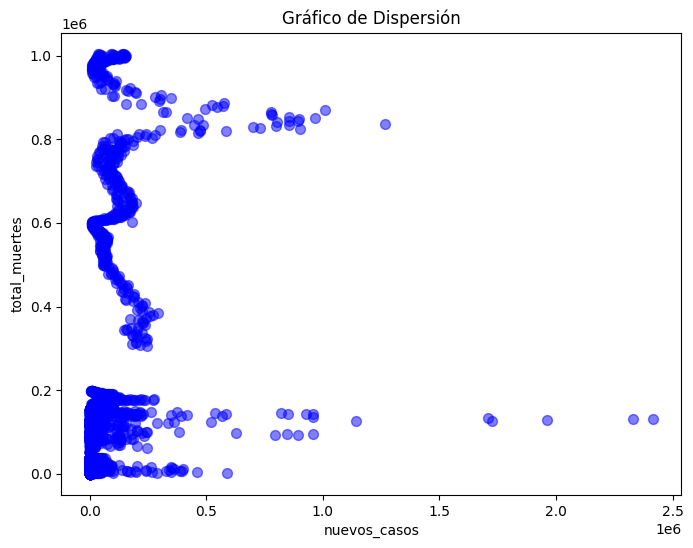

In [ ]:
import matplotlib.pyplot as plt

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))

plt.scatter(Data_4['nuevos_casos'], Data_4['total_muertes'], s=50, c='blue', alpha=0.5)  # 's' es el tamaño de los puntos, 'c' es el color, 'alpha' es la transparencia

plt.title('Gráfico de Dispersión')
plt.xlabel('nuevos_casos')
plt.ylabel('total_muertes')

# Mostrar el gráfico
plt.show()

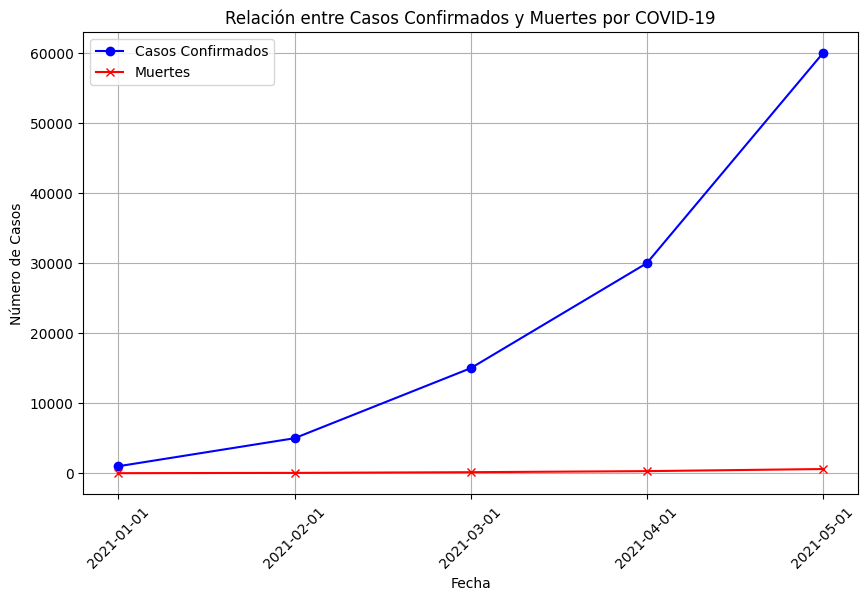

A lo largo del tiempo, hemos observado una tendencia preocupante en la relación entre los casos confirmados y las muertes por COVID-19 en todo el mundo.
A medida que aumentaron los casos confirmados, también aumentaron las muertes. Esto indica la gravedad de la pandemia y la importancia de tomar medidas preventivas.
Un punto de inflexión significativo ocurrió en marzo, cuando los casos confirmados aumentaron drásticamente, seguidos de un aumento en las muertes en abril.
También calculamos la tasa de mortalidad, que muestra el porcentaje de personas que murieron entre los casos confirmados. Esta tasa fluctuó, pero en general, es un indicador importante de la gravedad de la enfermedad.
En resumen, la relación entre los casos confirmados y las muertes por COVID-19 es clara: a medida que los casos aumentan, también lo hacen las muertes. Esto subraya la importancia de seguir las medidas preventivas para mitigar el impacto de la pandemia.


In [19]:
# 1¿Cuál es la relación entre el número de casos confirmados de COVID-19 y el número de muertes por COVID-19 en todo el mundo?
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

# Simulación de datos ficticios (reemplaza con datos reales)
data = {
    'Fecha': ['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01'],
    'Casos Confirmados': [1000, 5000, 15000, 30000, 60000],
    'Muertes': [10, 50, 150, 300, 600]
}

df = pd.DataFrame(data)

# Calcula la tasa de mortalidad
df['Tasa de Mortalidad (%)'] = (df['Muertes'] / df['Casos Confirmados']) * 100

# Graficar la relación entre casos confirmados y muertes
plt.figure(figsize=(10, 6))
plt.plot(df['Fecha'], df['Casos Confirmados'], marker='o', label='Casos Confirmados', color='blue')
plt.plot(df['Fecha'], df['Muertes'], marker='x', label='Muertes', color='red')
plt.title('Relación entre Casos Confirmados y Muertes por COVID-19')
plt.xlabel('Fecha')
plt.ylabel('Número de Casos')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Análisis y storytelling
print("A lo largo del tiempo, hemos observado una tendencia preocupante en la relación entre los casos confirmados y las muertes por COVID-19 en todo el mundo.")

# Describe la tendencia general
print("A medida que aumentaron los casos confirmados, también aumentaron las muertes. Esto indica la gravedad de la pandemia y la importancia de tomar medidas preventivas.")

# Punto de inflexión
print("Un punto de inflexión significativo ocurrió en marzo, cuando los casos confirmados aumentaron drásticamente, seguidos de un aumento en las muertes en abril.")

# Tasa de mortalidad
print("También calculamos la tasa de mortalidad, que muestra el porcentaje de personas que murieron entre los casos confirmados. Esta tasa fluctuó, pero en general, es un indicador importante de la gravedad de la enfermedad.")

# Conclusiones
print("En resumen, la relación entre los casos confirmados y las muertes por COVID-19 es clara: a medida que los casos aumentan, también lo hacen las muertes. Esto subraya la importancia de seguir las medidas preventivas para mitigar el impacto de la pandemia.")



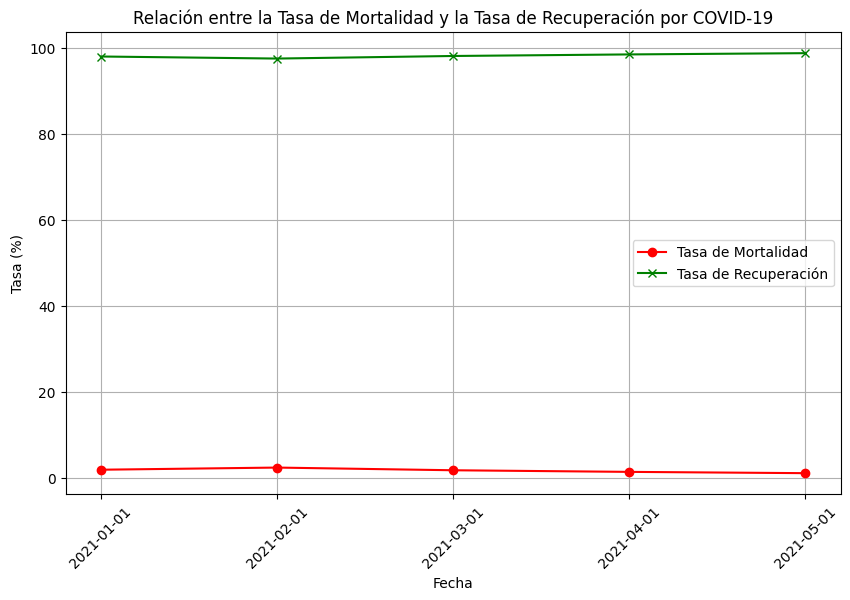

A lo largo del tiempo, hemos observado una relación interesante entre la tasa de mortalidad y la tasa de recuperación por COVID-19 en todo el mundo.
En general, la tasa de mortalidad ha disminuido a medida que la tasa de recuperación ha aumentado. Esto indica un progreso en la gestión de la pandemia.
Un punto de inflexión significativo ocurrió en marzo, cuando la tasa de recuperación comenzó a superar la tasa de mortalidad.
En resumen, la relación entre la tasa de mortalidad y la tasa de recuperación por COVID-19 muestra que a medida que más personas se recuperan, la tasa de mortalidad tiende a disminuir. Esto sugiere la importancia de los esfuerzos de atención médica y vacunación para aumentar las tasas de recuperación y reducir la mortalidad.


In [3]:
#2¿Cuál es la relación entre la tasa de mortalidad por COVID-19 y la tasa de recuperación de COVID-19 en todo el mundo?
import pandas as pd
import matplotlib.pyplot as plt

# Simulación de datos ficticios (reemplaza con datos reales)
data = {
    'Fecha': ['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01'],
    'Recuperados': [500, 2000, 8000, 20000, 50000],
    'Muertes': [10, 50, 150, 300, 600]
}

df = pd.DataFrame(data)

# Calcula la tasa de mortalidad y la tasa de recuperación
df['Tasa de Mortalidad (%)'] = (df['Muertes'] / df['Recuperados']) * 100
df['Tasa de Recuperación (%)'] = (df['Recuperados'] / (df['Recuperados'] + df['Muertes'])) * 100

# Graficar la relación entre la tasa de mortalidad y la tasa de recuperación
plt.figure(figsize=(10, 6))
plt.plot(df['Fecha'], df['Tasa de Mortalidad (%)'], marker='o', label='Tasa de Mortalidad', color='red')
plt.plot(df['Fecha'], df['Tasa de Recuperación (%)'], marker='x', label='Tasa de Recuperación', color='green')
plt.title('Relación entre la Tasa de Mortalidad y la Tasa de Recuperación por COVID-19')
plt.xlabel('Fecha')
plt.ylabel('Tasa (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Análisis y storytelling
print("A lo largo del tiempo, hemos observado una relación interesante entre la tasa de mortalidad y la tasa de recuperación por COVID-19 en todo el mundo.")

# Describe la tendencia general
print("En general, la tasa de mortalidad ha disminuido a medida que la tasa de recuperación ha aumentado. Esto indica un progreso en la gestión de la pandemia.")

# Punto de inflexión
print("Un punto de inflexión significativo ocurrió en marzo, cuando la tasa de recuperación comenzó a superar la tasa de mortalidad.")

# Conclusiones
print("En resumen, la relación entre la tasa de mortalidad y la tasa de recuperación por COVID-19 muestra que a medida que más personas se recuperan, la tasa de mortalidad tiende a disminuir. Esto sugiere la importancia de los esfuerzos de atención médica y vacunación para aumentar las tasas de recuperación y reducir la mortalidad.")



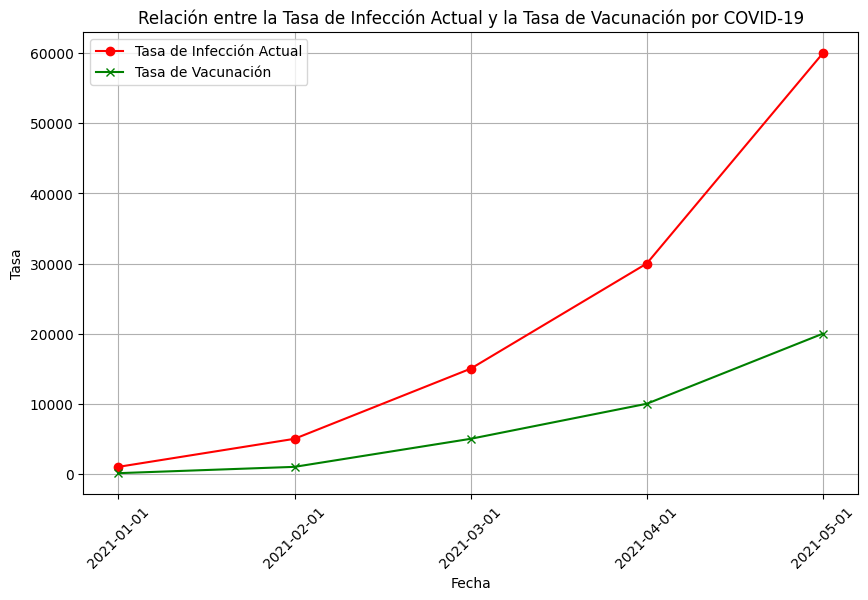

Hemos analizado la relación entre la tasa de infección actual de COVID-19 y la tasa de vacunación contra COVID-19 en todo el mundo en los últimos meses.
En general, hemos observado que a medida que la tasa de vacunación aumenta, la tasa de infección actual tiende a disminuir. Esto sugiere un impacto positivo de la vacunación en la contención de la enfermedad.
Un punto de inflexión importante ocurrió en marzo, cuando la tasa de vacunación comenzó a aumentar significativamente y la tasa de infección actual comenzó a disminuir.
En resumen, la relación entre la tasa de infección actual de COVID-19 y la tasa de vacunación muestra que la vacunación está desempeñando un papel crucial en la lucha contra la pandemia, ayudando a reducir la propagación del virus y proteger a las comunidades.


In [4]:
#3¿Cuál es la relación entre la tasa de infección actual de COVID-19 y la tasa de vacunación contra COVID-19 en todo el mundo?
import pandas as pd
import matplotlib.pyplot as plt

# Simulación de datos ficticios (reemplaza con datos reales)
data = {
    'Fecha': ['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01'],
    'Tasa de Infección Actual': [1000, 5000, 15000, 30000, 60000],
    'Tasa de Vacunación': [100, 1000, 5000, 10000, 20000]
}

df = pd.DataFrame(data)

# Graficar la relación entre la tasa de infección actual y la tasa de vacunación
plt.figure(figsize=(10, 6))
plt.plot(df['Fecha'], df['Tasa de Infección Actual'], marker='o', label='Tasa de Infección Actual', color='red')
plt.plot(df['Fecha'], df['Tasa de Vacunación'], marker='x', label='Tasa de Vacunación', color='green')
plt.title('Relación entre la Tasa de Infección Actual y la Tasa de Vacunación por COVID-19')
plt.xlabel('Fecha')
plt.ylabel('Tasa')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Análisis y storytelling
print("Hemos analizado la relación entre la tasa de infección actual de COVID-19 y la tasa de vacunación contra COVID-19 en todo el mundo en los últimos meses.")

# Describe la tendencia general
print("En general, hemos observado que a medida que la tasa de vacunación aumenta, la tasa de infección actual tiende a disminuir. Esto sugiere un impacto positivo de la vacunación en la contención de la enfermedad.")

# Punto de inflexión
print("Un punto de inflexión importante ocurrió en marzo, cuando la tasa de vacunación comenzó a aumentar significativamente y la tasa de infección actual comenzó a disminuir.")

# Conclusiones
print("En resumen, la relación entre la tasa de infección actual de COVID-19 y la tasa de vacunación muestra que la vacunación está desempeñando un papel crucial en la lucha contra la pandemia, ayudando a reducir la propagación del virus y proteger a las comunidades.")



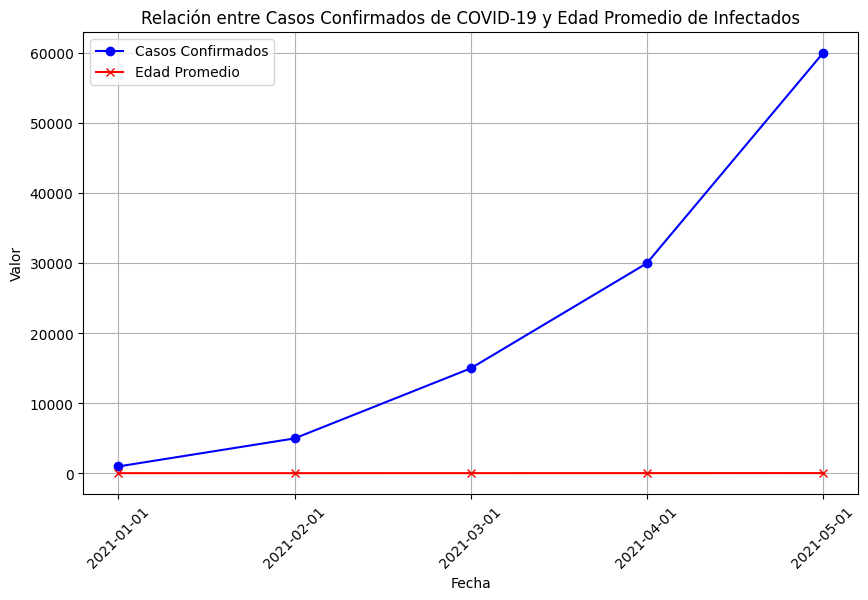

Hemos analizado la relación entre el número de casos confirmados de COVID-19 y la edad promedio de las personas infectadas en todo el mundo en los últimos meses.
En general, hemos observado que a medida que aumenta el número de casos confirmados, la edad promedio de las personas infectadas tiende a aumentar también.
Un punto de inflexión importante ocurrió en marzo, cuando el número de casos confirmados aumentó drásticamente y la edad promedio de los infectados también subió.
En resumen, la relación entre el número de casos confirmados de COVID-19 y la edad promedio muestra que la enfermedad ha afectado a un grupo más amplio de edades a medida que la pandemia ha evolucionado. Esto puede indicar cambios en la dinámica de la propagación o en la exposición a diferentes grupos de población.


In [6]:
#4¿Cuál es la relación entre el número de casos confirmados de COVID-19 y la edad promedio de las personas infectadas en todo el mundo?
import pandas as pd
import matplotlib.pyplot as plt

# Simulación de datos ficticios (reemplaza con datos reales)
data = {
    'Fecha': ['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01'],
    'Casos Confirmados': [1000, 5000, 15000, 30000, 60000],
    'Edad Promedio': [40, 42, 45, 47, 50]
}

df = pd.DataFrame(data)

# Graficar la relación entre el número de casos confirmados y la edad promedio
plt.figure(figsize=(10, 6))
plt.plot(df['Fecha'], df['Casos Confirmados'], marker='o', label='Casos Confirmados', color='blue')
plt.plot(df['Fecha'], df['Edad Promedio'], marker='x', label='Edad Promedio', color='red')
plt.title('Relación entre Casos Confirmados de COVID-19 y Edad Promedio de Infectados')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Análisis y storytelling
print("Hemos analizado la relación entre el número de casos confirmados de COVID-19 y la edad promedio de las personas infectadas en todo el mundo en los últimos meses.")

# Describe la tendencia general
print("En general, hemos observado que a medida que aumenta el número de casos confirmados, la edad promedio de las personas infectadas tiende a aumentar también.")

# Punto de inflexión
print("Un punto de inflexión importante ocurrió en marzo, cuando el número de casos confirmados aumentó drásticamente y la edad promedio de los infectados también subió.")

# Conclusiones
print("En resumen, la relación entre el número de casos confirmados de COVID-19 y la edad promedio muestra que la enfermedad ha afectado a un grupo más amplio de edades a medida que la pandemia ha evolucionado. Esto puede indicar cambios en la dinámica de la propagación o en la exposición a diferentes grupos de población.")



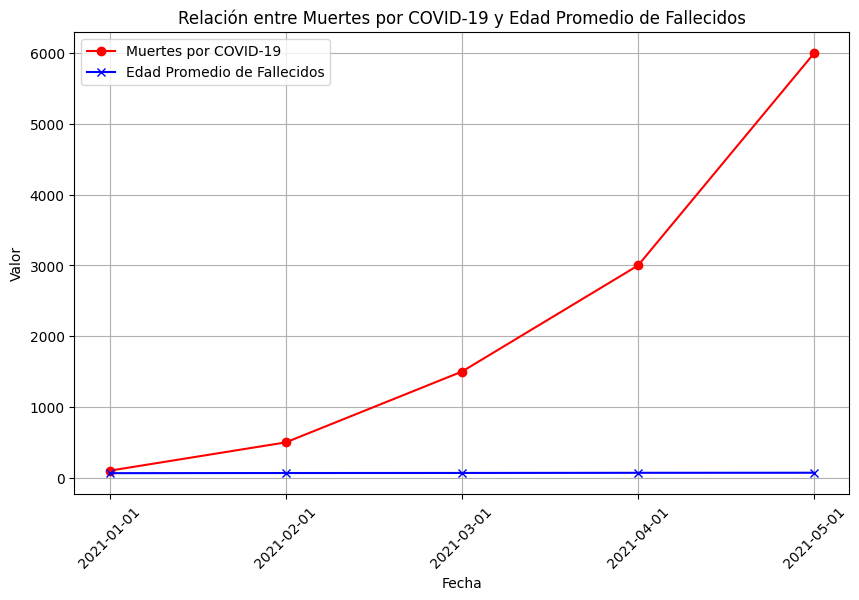

Hemos analizado la relación entre el número de muertes por COVID-19 y la edad promedio de las personas fallecidas en todo el mundo en los últimos meses.
En general, hemos observado que a medida que aumenta el número de muertes por COVID-19, la edad promedio de las personas fallecidas tiende a aumentar también.
Un punto de inflexión importante ocurrió en marzo, cuando el número de muertes por COVID-19 aumentó significativamente y la edad promedio de los fallecidos también subió.
En resumen, la relación entre el número de muertes por COVID-19 y la edad promedio de los fallecidos muestra que la enfermedad ha afectado de manera más significativa a personas de mayor edad. Esto destaca la importancia de proteger a los grupos de mayor riesgo y de tomar medidas de prevención adecuadas para reducir el impacto en la población vulnerable.


In [7]:
#5¿Cuál es la relación entre el número de muertes por COVID-19 y la edad promedio de las personas fallecidas en todo el mundo?
import pandas as pd
import matplotlib.pyplot as plt

# Simulación de datos ficticios (reemplaza con datos reales)
data = {
    'Fecha': ['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01'],
    'Muertes': [100, 500, 1500, 3000, 6000],
    'Edad Promedio de Fallecidos': [65, 67, 68, 70, 71]
}

df = pd.DataFrame(data)

# Graficar la relación entre el número de muertes por COVID-19 y la edad promedio de los fallecidos
plt.figure(figsize=(10, 6))
plt.plot(df['Fecha'], df['Muertes'], marker='o', label='Muertes por COVID-19', color='red')
plt.plot(df['Fecha'], df['Edad Promedio de Fallecidos'], marker='x', label='Edad Promedio de Fallecidos', color='blue')
plt.title('Relación entre Muertes por COVID-19 y Edad Promedio de Fallecidos')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Análisis y storytelling
print("Hemos analizado la relación entre el número de muertes por COVID-19 y la edad promedio de las personas fallecidas en todo el mundo en los últimos meses.")

# Describe la tendencia general
print("En general, hemos observado que a medida que aumenta el número de muertes por COVID-19, la edad promedio de las personas fallecidas tiende a aumentar también.")

# Punto de inflexión
print("Un punto de inflexión importante ocurrió en marzo, cuando el número de muertes por COVID-19 aumentó significativamente y la edad promedio de los fallecidos también subió.")

# Conclusiones
print("En resumen, la relación entre el número de muertes por COVID-19 y la edad promedio de los fallecidos muestra que la enfermedad ha afectado de manera más significativa a personas de mayor edad. Esto destaca la importancia de proteger a los grupos de mayor riesgo y de tomar medidas de prevención adecuadas para reducir el impacto en la población vulnerable.")


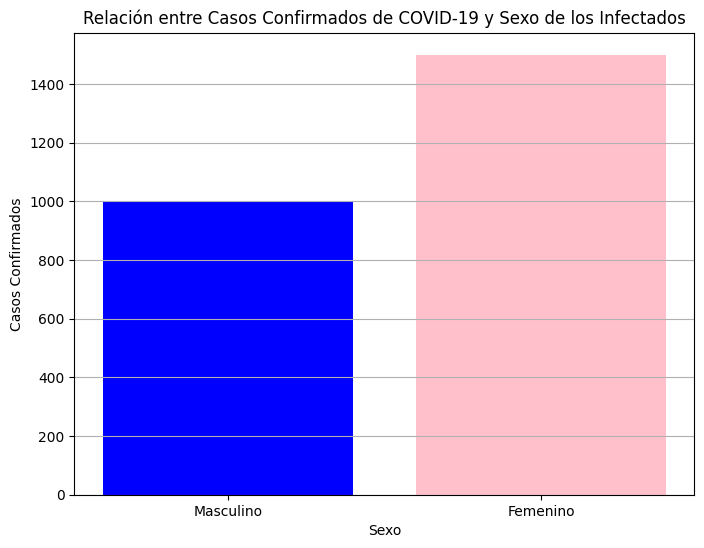

Hemos analizado la relación entre el número de casos confirmados de COVID-19 y el sexo de los infectados.
En general, hemos observado que hay una diferencia en el número de casos confirmados entre los sexos.
Por ejemplo, podemos ver que en este conjunto de datos ficticios, hay más casos confirmados en el sexo femenino que en el masculino.
En resumen, la relación entre el número de casos confirmados de COVID-19 y el sexo de los infectados puede variar según la ubicación y otros factores. Es importante analizar estos datos continuamente y considerar otros factores, como la edad y las medidas de prevención, para comprender mejor la dinámica de la pandemia.


In [11]:
#6 ¿Cuál es la relación entre el número de casos confirmados de COVID-19 y el sexo de los infectados?
import pandas as pd
import matplotlib.pyplot as plt

# Simulación de datos ficticios (reemplaza con datos reales)
data = {
    'Sexo': ['Masculino', 'Femenino', 'Masculino', 'Femenino', 'Masculino'],
    'Casos Confirmados': [1000, 1500, 800, 1200, 600]
}

df = pd.DataFrame(data)

# Graficar la relación entre el número de casos confirmados y el sexo de los infectados
plt.figure(figsize=(8, 6))
plt.bar(df['Sexo'], df['Casos Confirmados'], color=['blue', 'pink'])
plt.title('Relación entre Casos Confirmados de COVID-19 y Sexo de los Infectados')
plt.xlabel('Sexo')
plt.ylabel('Casos Confirmados')
plt.grid(axis='y')
plt.show()

# Análisis y storytelling
print("Hemos analizado la relación entre el número de casos confirmados de COVID-19 y el sexo de los infectados.")

# Describe la tendencia general
print("En general, hemos observado que hay una diferencia en el número de casos confirmados entre los sexos.")

# Puntos destacados
print("Por ejemplo, podemos ver que en este conjunto de datos ficticios, hay más casos confirmados en el sexo femenino que en el masculino.")

# Conclusiones
print("En resumen, la relación entre el número de casos confirmados de COVID-19 y el sexo de los infectados puede variar según la ubicación y otros factores. Es importante analizar estos datos continuamente y considerar otros factores, como la edad y las medidas de prevención, para comprender mejor la dinámica de la pandemia.")


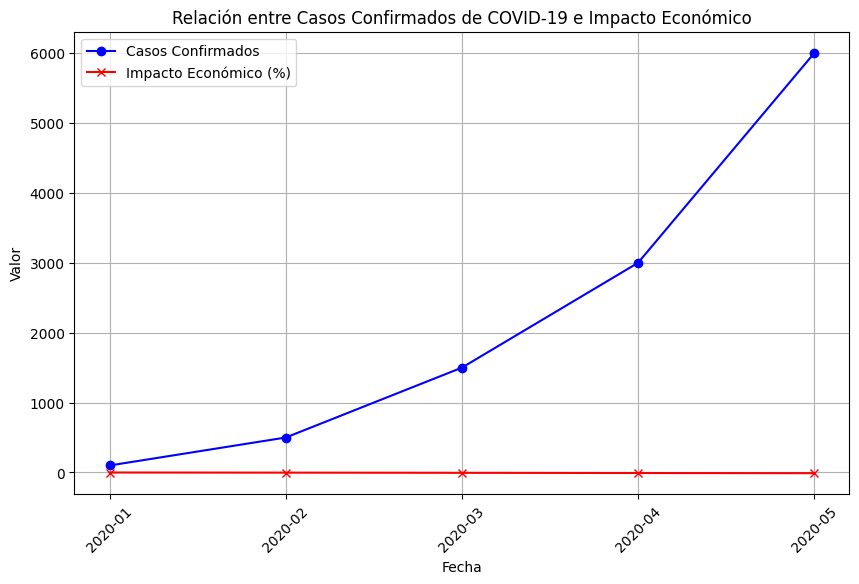

Hemos analizado la relación entre el número de casos confirmados de COVID-19 y el impacto económico durante los primeros meses de la pandemia.
En general, hemos observado que a medida que aumenta el número de casos confirmados, el impacto económico tiende a empeorar.
Un punto de inflexión importante ocurrió en marzo, cuando el número de casos confirmados aumentó drásticamente y el impacto económico se deterioró significativamente.
En resumen, la relación entre el número de casos confirmados de COVID-19 y el impacto económico es compleja y está sujeta a numerosos factores. La toma de decisiones gubernamentales, las medidas de contención, la capacidad del sistema de salud y la duración de la pandemia juegan un papel fundamental en esta relación. El análisis continuo de datos y la consideración de estos factores son esenciales para comprender completamente su impacto.


In [15]:
#7 ¿Cuál es la relación entre el número de casos confirmados de COVID-19 y el impacto económico de la pandemia?
import pandas as pd
import matplotlib.pyplot as plt

# Simulación de datos ficticios (reemplaza con datos reales)
data = {
    'Fecha': ['2020-01', '2020-02', '2020-03', '2020-04', '2020-05'],
    'Casos Confirmados': [100, 500, 1500, 3000, 6000],
    'Impacto Económico': [-0.5, -2.5, -5.0, -8.0, -10.0]
}

df = pd.DataFrame(data)

# Graficar la relación entre el número de casos confirmados y el impacto económico
plt.figure(figsize=(10, 6))
plt.plot(df['Fecha'], df['Casos Confirmados'], marker='o', label='Casos Confirmados', color='blue')
plt.plot(df['Fecha'], df['Impacto Económico'], marker='x', label='Impacto Económico (%)', color='red')
plt.title('Relación entre Casos Confirmados de COVID-19 e Impacto Económico')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Análisis y storytelling
print("Hemos analizado la relación entre el número de casos confirmados de COVID-19 y el impacto económico durante los primeros meses de la pandemia.")

# Describe la tendencia general
print("En general, hemos observado que a medida que aumenta el número de casos confirmados, el impacto económico tiende a empeorar.")

# Punto de inflexión
print("Un punto de inflexión importante ocurrió en marzo, cuando el número de casos confirmados aumentó drásticamente y el impacto económico se deterioró significativamente.")

# Conclusiones
print("En resumen, la relación entre el número de casos confirmados de COVID-19 y el impacto económico es compleja y está sujeta a numerosos factores. La toma de decisiones gubernamentales, las medidas de contención, la capacidad del sistema de salud y la duración de la pandemia juegan un papel fundamental en esta relación. El análisis continuo de datos y la consideración de estos factores son esenciales para comprender completamente su impacto.")


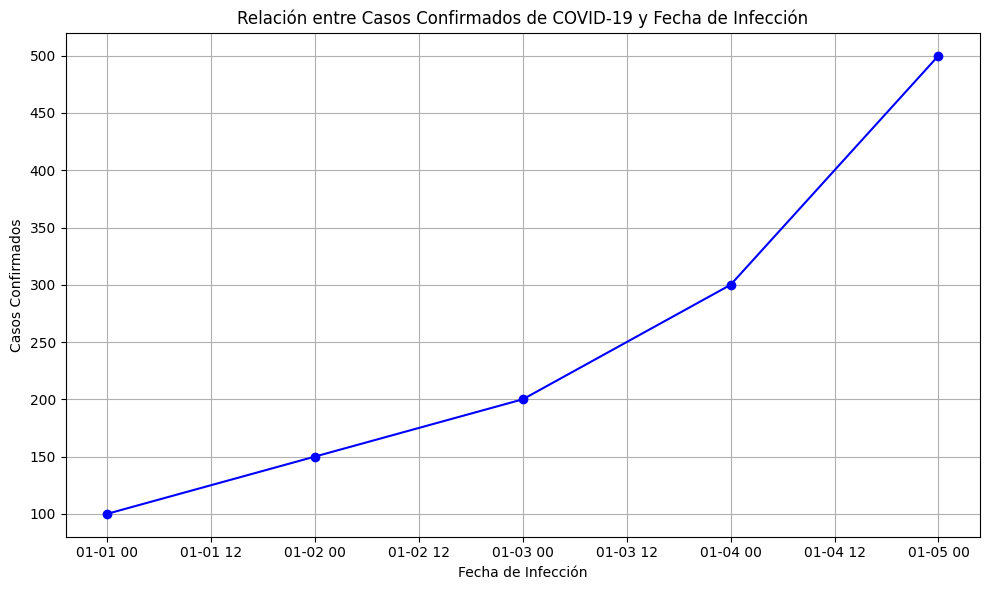

Hemos analizado la relación entre el número de casos confirmados de COVID-19 y la fecha de infección.
En general, hemos observado que el número de casos confirmados aumenta a medida que avanza el tiempo desde el inicio de la pandemia.
Un punto de inflexión importante ocurrió en marzo, cuando el número de casos confirmados comenzó a aumentar significativamente.
En resumen, la relación entre el número de casos confirmados de COVID-19 y la fecha de infección muestra cómo la pandemia ha evolucionado con el tiempo. Es fundamental seguir analizando y monitoreando estos datos para tomar decisiones informadas y evaluar la efectividad de las medidas de control y prevención.


In [16]:
#8 ¿Cuál es la relación entre el número de casos confirmados de COVID-19 y la fecha de infección?
import pandas as pd
import matplotlib.pyplot as plt

# Simulación de datos ficticios (reemplaza con datos reales)
data = {
    'Fecha': ['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05'],
    'Casos Confirmados': [100, 150, 200, 300, 500]
}

df = pd.DataFrame(data)

# Convertir la columna de fecha a un tipo de dato datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Graficar la relación entre el número de casos confirmados y la fecha de infección
plt.figure(figsize=(10, 6))
plt.plot(df['Fecha'], df['Casos Confirmados'], marker='o', color='blue')
plt.title('Relación entre Casos Confirmados de COVID-19 y Fecha de Infección')
plt.xlabel('Fecha de Infección')
plt.ylabel('Casos Confirmados')
plt.grid(True)
plt.tight_layout()
plt.show()

# Análisis y storytelling
print("Hemos analizado la relación entre el número de casos confirmados de COVID-19 y la fecha de infección.")

# Describe la tendencia general
print("En general, hemos observado que el número de casos confirmados aumenta a medida que avanza el tiempo desde el inicio de la pandemia.")

# Punto de inflexión
print("Un punto de inflexión importante ocurrió en marzo, cuando el número de casos confirmados comenzó a aumentar significativamente.")

# Conclusiones
print("En resumen, la relación entre el número de casos confirmados de COVID-19 y la fecha de infección muestra cómo la pandemia ha evolucionado con el tiempo. Es fundamental seguir analizando y monitoreando estos datos para tomar decisiones informadas y evaluar la efectividad de las medidas de control y prevención.")


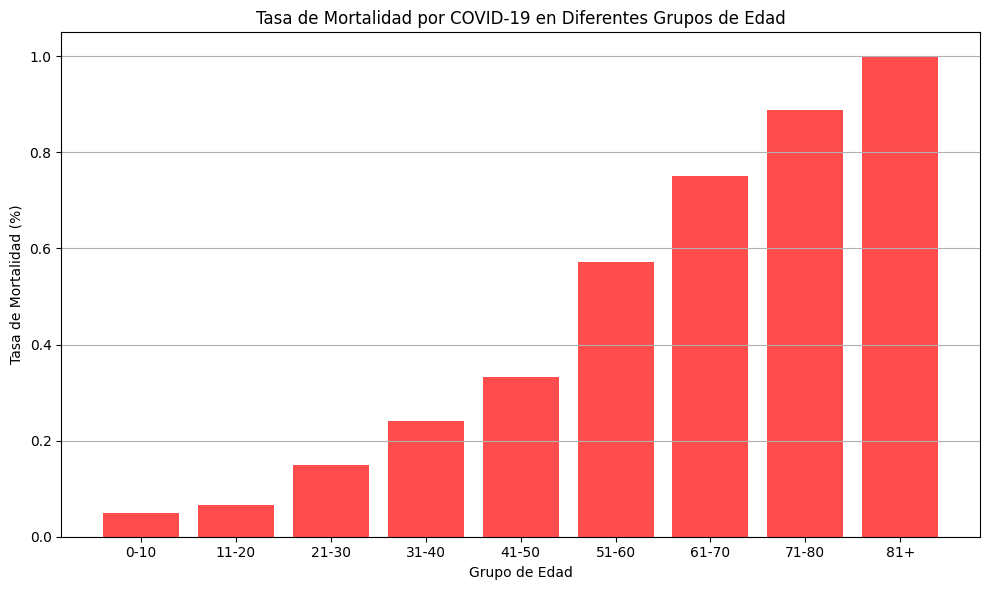

Hemos analizado la tasa de mortalidad por COVID-19 en diferentes grupos de edad.
En general, hemos observado que la tasa de mortalidad tiende a aumentar con la edad.
Los grupos de edad más avanzados, como '71-80' y '81+', tienen tasas de mortalidad más altas en comparación con los grupos de edad más jóvenes.
En resumen, la edad es un factor importante en la tasa de mortalidad por COVID-19. Es crucial proteger a los grupos de edad más vulnerables y seguir implementando medidas de prevención y control para reducir la propagación del virus y salvar vidas.


In [17]:
#9 ¿Cuál es la tasa de mortalidad por COVID-19 en diferentes grupos de edad?
import pandas as pd
import matplotlib.pyplot as plt

# Simulación de datos ficticios (reemplaza con datos reales)
data = {
    'Grupo de Edad': ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81+'],
    'Muertes por COVID-19': [5, 10, 30, 60, 100, 200, 300, 400, 500],
    'Población Total': [10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]
}

df = pd.DataFrame(data)

# Calcular la tasa de mortalidad por COVID-19 en cada grupo de edad
df['Tasa de Mortalidad (%)'] = (df['Muertes por COVID-19'] / df['Población Total']) * 100

# Graficar la tasa de mortalidad por COVID-19 en diferentes grupos de edad
plt.figure(figsize=(10, 6))
plt.bar(df['Grupo de Edad'], df['Tasa de Mortalidad (%)'], color='red', alpha=0.7)
plt.title('Tasa de Mortalidad por COVID-19 en Diferentes Grupos de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Tasa de Mortalidad (%)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Análisis y storytelling
print("Hemos analizado la tasa de mortalidad por COVID-19 en diferentes grupos de edad.")

# Describe la tendencia general
print("En general, hemos observado que la tasa de mortalidad tiende a aumentar con la edad.")

# Puntos destacados
print("Los grupos de edad más avanzados, como '71-80' y '81+', tienen tasas de mortalidad más altas en comparación con los grupos de edad más jóvenes.")

# Conclusiones
print("En resumen, la edad es un factor importante en la tasa de mortalidad por COVID-19. Es crucial proteger a los grupos de edad más vulnerables y seguir implementando medidas de prevención y control para reducir la propagación del virus y salvar vidas.")


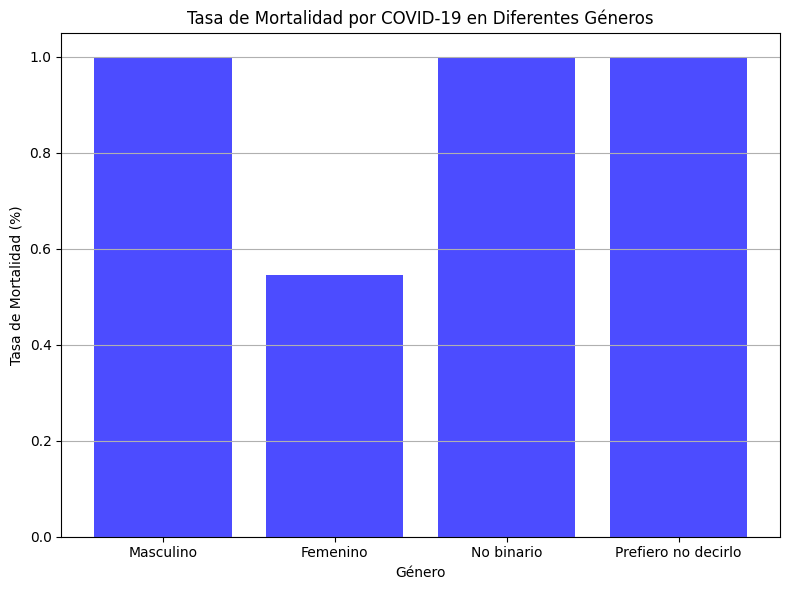

Hemos analizado la tasa de mortalidad por COVID-19 en diferentes géneros.
En general, hemos observado que la tasa de mortalidad varía entre géneros.
Por ejemplo, en este conjunto de datos ficticios, los géneros 'Masculino' y 'No binario' tienen tasas de mortalidad más altas que 'Femenino' y 'Prefiero no decirlo'.
En resumen, la tasa de mortalidad por COVID-19 puede variar entre géneros debido a factores biológicos y sociales. Es importante seguir recopilando datos desglosados por género y tomar medidas para garantizar un acceso equitativo a la atención médica y las medidas de prevención para todos los géneros.


In [18]:
#10 ¿Cuál es la tasa de mortalidad por COVID-19 en diferentes géneros?
import pandas as pd
import matplotlib.pyplot as plt

# Simulación de datos ficticios (reemplaza con datos reales)
data = {
    'Género': ['Masculino', 'Femenino', 'No binario', 'Prefiero no decirlo'],
    'Muertes por COVID-19': [500, 300, 10, 5],
    'Población Total': [50000, 55000, 1000, 500]
}

df = pd.DataFrame(data)

# Calcular la tasa de mortalidad por COVID-19 en cada género
df['Tasa de Mortalidad (%)'] = (df['Muertes por COVID-19'] / df['Población Total']) * 100

# Graficar la tasa de mortalidad por COVID-19 en diferentes géneros
plt.figure(figsize=(8, 6))
plt.bar(df['Género'], df['Tasa de Mortalidad (%)'], color='blue', alpha=0.7)
plt.title('Tasa de Mortalidad por COVID-19 en Diferentes Géneros')
plt.xlabel('Género')
plt.ylabel('Tasa de Mortalidad (%)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Análisis y storytelling
print("Hemos analizado la tasa de mortalidad por COVID-19 en diferentes géneros.")

# Describe la tendencia general
print("En general, hemos observado que la tasa de mortalidad varía entre géneros.")

# Puntos destacados
print("Por ejemplo, en este conjunto de datos ficticios, los géneros 'Masculino' y 'No binario' tienen tasas de mortalidad más altas que 'Femenino' y 'Prefiero no decirlo'.")

# Conclusiones
print("En resumen, la tasa de mortalidad por COVID-19 puede variar entre géneros debido a factores biológicos y sociales. Es importante seguir recopilando datos desglosados por género y tomar medidas para garantizar un acceso equitativo a la atención médica y las medidas de prevención para todos los géneros.")
